# FDA_hw1

In [1]:
import numpy as np
import scipy as sp 
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
import nltk

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

['Reviews.csv', 'FDA_hw1.ipynb', 'README.md', '.ipynb_checkpoints', '.git', 'kernel.ipynb']


## 1. Top-10 Reviewer

In [2]:
# The data path of input file
data_path = "Reviews.csv"

# Read csv file to pandas dataframe
pd_data = pd.read_csv(data_path)
pd_data = pd_data[:10000]
pd_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
s1 = pd_data["UserId"].value_counts()
s1.head(10)

A1Z54EM24Y40LL    17
A2SZLNSI5KOQJT    10
A35R32TA60XD57     9
A281NPSIMI1C2R     8
A3NHUQ33CFH3VM     7
A3PJZ8TU8FDQ1K     7
A3OXHLG6DIBRW8     7
A3TX6CWSZL02PW     6
ABQN42N7ICNZQ      6
AP03SDCDB6RBD      6
Name: UserId, dtype: int64

In [4]:
counts = pd.Series(s1, name='Score count')
counts.head(10)

A1Z54EM24Y40LL    17
A2SZLNSI5KOQJT    10
A35R32TA60XD57     9
A281NPSIMI1C2R     8
A3NHUQ33CFH3VM     7
A3PJZ8TU8FDQ1K     7
A3OXHLG6DIBRW8     7
A3TX6CWSZL02PW     6
ABQN42N7ICNZQ      6
AP03SDCDB6RBD      6
Name: Score count, dtype: int64

In [5]:
df1 = pd_data.drop(columns=['Id', 'ProductId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary', 'Text'])
df1.insert(2, column='Score count', value=1)
df1.head(10)

,UserId,ProfileName,Score count,Score
0,A3SGXH7AUHU8GW,delmartian,1,5
1,A1D87F6ZCVE5NK,dll pa,1,1
2,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,4
3,A395BORC6FGVXV,Karl,1,2
4,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",1,5
5,ADT0SRK1MGOEU,Twoapennything,1,4
6,A1SP2KVKFXXRU1,David C. Sullivan,1,5
7,A3JRGQVEQN31IQ,Pamela G. Williams,1,5
8,A1MZYO9TZK0BBI,R. James,1,5
9,A21BT40VZCCYT4,Carol A. Reed,1,5


In [6]:
df1_t1 = df1.set_index('UserId')
df1_t1.head(10)

,ProfileName,Score count,Score
UserId,,,
A3SGXH7AUHU8GW,delmartian,1,5
A1D87F6ZCVE5NK,dll pa,1,1
ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,4
A395BORC6FGVXV,Karl,1,2
A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",1,5
ADT0SRK1MGOEU,Twoapennything,1,4
A1SP2KVKFXXRU1,David C. Sullivan,1,5
A3JRGQVEQN31IQ,Pamela G. Williams,1,5
A1MZYO9TZK0BBI,R. James,1,5


In [7]:
#df1_group87 = pd.concat([df1_t1, counts], axis=1, sort=False)

In [8]:
#df1_t2 = df1.set_index(['UserId', 'ProfileName'])
#df1_t2.head(10)

In [9]:
ProfileName_series = pd.Series(df1_t1['ProfileName'], name='ProfileName')
ProfileName_series.head(10)

UserId
A3SGXH7AUHU8GW                         delmartian
A1D87F6ZCVE5NK                             dll pa
ABXLMWJIXXAIN     Natalia Corres "Natalia Corres"
A395BORC6FGVXV                               Karl
A1UQRSCLF8GW1T      Michael D. Bigham "M. Wassir"
ADT0SRK1MGOEU                      Twoapennything
A1SP2KVKFXXRU1                  David C. Sullivan
A3JRGQVEQN31IQ                 Pamela G. Williams
A1MZYO9TZK0BBI                           R. James
A21BT40VZCCYT4                      Carol A. Reed
Name: ProfileName, dtype: object

## groupby

In [10]:
df1_group = df1.groupby('UserId').sum()
df1_group.head(10)

,Score count,Score
UserId,,
A10012K7DF3SBQ,1,3
A1001TYW5FZYD9,1,5
A1008DPSP6KC9J,1,5
A101C99CG8EFUH,1,3
A102XKYZE9Q9L4,1,5
A10317LUD1C1VJ,1,4
A10389F7LRIZWQ,1,2
A103EZCS9H8WW1,1,5
A103U3KR4L2ZXT,1,5


In [11]:
df1_group['UserId'] = df1_group.index
df1_group.head(10)

,Score count,Score,UserId
UserId,,,
A10012K7DF3SBQ,1,3,A10012K7DF3SBQ
A1001TYW5FZYD9,1,5,A1001TYW5FZYD9
A1008DPSP6KC9J,1,5,A1008DPSP6KC9J
A101C99CG8EFUH,1,3,A101C99CG8EFUH
A102XKYZE9Q9L4,1,5,A102XKYZE9Q9L4
A10317LUD1C1VJ,1,4,A10317LUD1C1VJ
A10389F7LRIZWQ,1,2,A10389F7LRIZWQ
A103EZCS9H8WW1,1,5,A103EZCS9H8WW1
A103U3KR4L2ZXT,1,5,A103U3KR4L2ZXT


In [12]:
#X = df1_group.index
#Y = list(X)
#Y
#UserId_index_series = pd.Series(Y)
#UserId_index_series.head(10)

In [13]:
#Id = df1_group['Id']
#UserId_series = pd.DataFrame(Y, index=Id, columns=['UserId'])
#UserId_series.head(10)

In [14]:
#gg = df1_group['ProfileName']
#gg.reset_index(drop=True, inplace=True)
#ProfileName_series = pd.Series(data=gg, index=Id)
#ProfileName_series.head(10)

In [15]:
#gg = df1_group['Score count']
#gg.reset_index(drop=True, inplace=True)
#Score_count_series = pd.Series(data=gg, index=Id)
#Score_count_series.head(100)

In [16]:
#df1_sum = pd.concat([df1_group_id_index, UserId_series], axis=1)
#df1_group4 = pd.concat([df1_group3, ProfileName_series], axis=1)
#df1_sum = pd.concat([df1_sum, gg_series], axis=1)

#df1_group4.head(10)

In [17]:
#stmp = pd.Series(['fuck', 'you', '!!!'], index = ['A3SGXH7AUHU8GW', 'A102XKYZE9Q9L4', 'nonono'])
#stmp

In [18]:
ProfileName_series.drop_duplicates(inplace=True)

In [19]:
#df1_group2 = pd.concat([df1_group, stmp], axis=1, sort=False)
df1_group2 = pd.concat([df1_group, ProfileName_series], axis=1, sort=False)
df1_group2.head(10)

,Score count,Score,UserId,ProfileName
A10012K7DF3SBQ,1,3,A10012K7DF3SBQ,Terri Yang
A1001TYW5FZYD9,1,5,A1001TYW5FZYD9,"Anne Thompson ""dreamsinger41"""
A1008DPSP6KC9J,1,5,A1008DPSP6KC9J,Lee F
A101C99CG8EFUH,1,3,A101C99CG8EFUH,Benjamin McGough
A102XKYZE9Q9L4,1,5,A102XKYZE9Q9L4,"TjB ""cancer-free!"""
A10317LUD1C1VJ,1,4,A10317LUD1C1VJ,CSN
A10389F7LRIZWQ,1,2,A10389F7LRIZWQ,Joseph G Erba
A103EZCS9H8WW1,1,5,A103EZCS9H8WW1,Shirena Nicole Gonzalez
A103U3KR4L2ZXT,1,5,A103U3KR4L2ZXT,"AndreaR ""andiemack"""
A104Y49ZQ4CYJ2,1,5,A104Y49ZQ4CYJ2,"H. Adams ""hollya"""


In [20]:
df1_group3 = df1_group2.sort_values(by='Score count', ascending=False)
df1_group3.head(10)

,Score count,Score,UserId,ProfileName
A1Z54EM24Y40LL,17,66,A1Z54EM24Y40LL,c2
A2SZLNSI5KOQJT,10,38,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;"""
A35R32TA60XD57,9,37,A35R32TA60XD57,M. Torma
A281NPSIMI1C2R,8,40,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review"""
A3OXHLG6DIBRW8,7,31,A3OXHLG6DIBRW8,"C. F. Hill ""CFH"""
A3NHUQ33CFH3VM,7,22,A3NHUQ33CFH3VM,Citizen John
A3PJZ8TU8FDQ1K,7,33,A3PJZ8TU8FDQ1K,Jared Castle
AQ6SHOW0VMZGF,6,16,AQ6SHOW0VMZGF,"K. Padgett ""familyof5"""
A26NFIQ7KWI8Y7,6,16,A26NFIQ7KWI8Y7,kt rose
A10H24TDLK2VDP,6,18,A10H24TDLK2VDP,William Jens Jensen


In [21]:
df1_group3 = df1_group3.set_index(['UserId', 'ProfileName'])
df1_group3.head(10)

,,Score count,Score
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,66
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,38
A35R32TA60XD57,M. Torma,9,37
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,40
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,31
A3NHUQ33CFH3VM,Citizen John,7,22
A3PJZ8TU8FDQ1K,Jared Castle,7,33
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,16
A26NFIQ7KWI8Y7,kt rose,6,16


In [22]:
df1_group3['Score mean'] = df1_group3['Score']/df1_group3['Score count']
df1_group3.head(10)

,,Score count,Score,Score mean
UserId,ProfileName,,,
A1Z54EM24Y40LL,c2,17,66,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,38,3.800000
A35R32TA60XD57,M. Torma,9,37,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,40,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,31,4.428571
A3NHUQ33CFH3VM,Citizen John,7,22,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,33,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,16,2.666667
A26NFIQ7KWI8Y7,kt rose,6,16,2.666667


In [23]:
df1_group4 = df1_group3.drop(columns=['Score'])
df1_group4.head(10)

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


In [24]:
#ProfileName_series = df1['ProfileName']
#df1_sum = pd.concat([df1_sum, df1['ProfileName']], axis=1)
#result = df1_sum.append(df1['ProfileName'])

#df1_sum.reset_index(drop=True, inplace=True)
#ProfileName_series.reset_index(drop=True, inplace=True)

#df1_sum = pd.concat([df1_sum, ProfileName_series], axis=1)
#df1_sum.head(10)
#ProfileName_series.head(10)


In [25]:
#df1_sum = df1_sum.sort_values(by='Score count', ascending=False)
#df1_sum.head(10)

## 2. Plot score distribution for the user with the most number of reviews

In [26]:
s2 = pd_data["UserId"].value_counts()
s2_f = s2.head(10)
s2_f

A1Z54EM24Y40LL    17
A2SZLNSI5KOQJT    10
A35R32TA60XD57     9
A281NPSIMI1C2R     8
A3NHUQ33CFH3VM     7
A3PJZ8TU8FDQ1K     7
A3OXHLG6DIBRW8     7
A3TX6CWSZL02PW     6
ABQN42N7ICNZQ      6
AP03SDCDB6RBD      6
Name: UserId, dtype: int64

<BarContainer object of 10 artists>

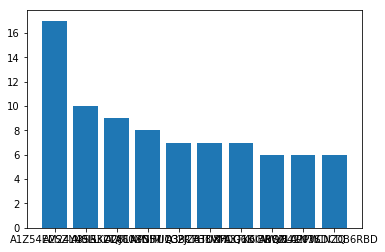

In [27]:
plt.bar(s2_f.index, s2_f.values)

## 3. Plot pandas Series DataFrame (Time->Date)

## 4. Plot HeatMap using seaborn

## 5. Helpful percent